## AUDIT SEO PYTHON

Instructions:
 - Il faut créer des sous-repertoires pour chaque analyse, cela facilitera les extracts
 - En entrée il faut IMPERATIVEMENT : l'overview SF + internal / external links , fichier de catégorisation et typage (utile / inutile)

Sommaire :
- <a href="#Data-importation">Initialisation</a>
- Technique :
  - Niveau de pronfondeur des pages
     + <a href="#Repartition-des-pages-par-niveau-de-profondeur">Repartition-des-pages-par-niveau-de-profondeur</a>
     + Niveau de profondeur des pages par catégorie
     + Niveau de profondeur des pages par type (utile / inutile)
  - Codes de réponses
     + Quelle répartion des codes de réponse au total sur le site ?
     + Quelle est la répartition des codes de réponses par niveau de profondeur ?
     + Quelles sont les pages avec des codes de réponses différents de 200 ?
     + Répartition des codes de réponse en fonction des catégories de page
  - Robots.txt rules
     + Quelles sont les URLs bloquées par les directives du robots.txt ?
     + Quelle proportion de page sont bloquée?
     + Quelles catégories de pages sont bloqués ?
  - Temps de chargement
     + Quel est le temps de chargement moyen sur le site ?
     + Répartition du temps de chargement moyen par catégorie de page
- Maillage interne :
   - Nombre de liens entrants 
     + Répartition du nombre de liens entrant par niveau de profondeur
     + Répartition du nombre de liens entrant par catégorie de page
     + Répartition du nombre de liens entrant par type de page (utile, inutile)
     + Répartition du pagerank en fonction du niveau de profondeur des pages
   - Nombre de liens sortants internes
     + Répartition du nombre de liens sortants par niveau de profondeur
     + Répartition du nombre de liens sortants par catégorie de page
     + Répartition du nombre de liens sortants par type de page (utile, inutile)
   - Nombre de liens externes sortants par niveau de profondeur
     + Répartition du nombre de liens sortants par niveau de profondeur
     + Répartition du nombre de liens sortants par catégorie de page
     + Répartition du nombre de liens sortants par type de page (utile, inutile)
     + Liens sortants cassés
- Sémantique :
  - Title, H1, Description
     + Quelles sont les pages qui ont un titre trop long (>70)
     + Quelles sont les pages qui ont un titre dupliqué ?
     + Quelles sont les pages qui n'ont pas de titre ?
     + Quelles sont les pages qui ont une desc trop longue (>250)

<br />
<br />
<h2>Lancement des librairies.  </h2>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Display plots directly in the notebook with "seaborn-muted" style
%matplotlib inline
plt.style.use(['seaborn-muted'])

### Data importation
- one (`urls`) for URLs data,  
- and the second (`links`) for links
- ajout de la catégorisation


In [6]:
#Quel est le domain étudié ?
domainname = "https://fr.arthusbertrand.com"

In [7]:
# We skip the first row with `skiprows`, and
# load only useful data with `usecols` argument.
urls = pd.read_csv('data/internal_all_arthus.csv',skiprows=1,
                  usecols=["Address","Crawl Depth","Content","Status Code","Status","Title 1","Title 1 Length",
                           "Title 1 Pixel Width","Meta Description 1","Meta Description 1 Length",
                           "Meta Description 1 Pixel Width","Meta Keyword 1","Meta Keywords 1 Length","H1-1",
                           "H1-1 length","H2-1","H2-1 length","H2-2","H2-2 length","Meta Robots 1","Meta Refresh 1",
                           "Canonical Link Element 1","Size","Word Count","Text Ratio","Inlinks","Unique Inlinks",
                           "% of Total","Outlinks","Unique Outlinks","External Outlinks","Unique External Outlinks",
                           "Hash","Response Time","Last Modified","Redirect URI","Redirect Type","URL Encoded Address"])
urls.head() # show the first rows of the dataframe: helpful to check if all went right.

,Address,Crawl Depth,Content,Status Code,Status,Title 1,Title 1 Length,Title 1 Pixel Width,Meta Description 1,Meta Description 1 Length,...,Outlinks,Unique Outlinks,External Outlinks,Unique External Outlinks,Hash,Response Time,Last Modified,Redirect URI,Redirect Type,URL Encoded Address
0,https://fr.arthusbertrand.com/wishlist/index/a...,6,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...
1,https://fr.arthusbertrand.com/wishlist/index/a...,4,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...
2,https://fr.arthusbertrand.com/wishlist/index/a...,4,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...
3,https://fr.arthusbertrand.com/wishlist/index/a...,3,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...
4,https://fr.arthusbertrand.com/produit/bague-am...,3,text/html; charset=UTF-8,200,OK,Bague Egerie - Arthus-Bertrand - 21223601XX,43,369,"Arthus-Bertrand vous présente Egerie, Bague Ar...",118,...,131,72,14,10,5324f2fff367f993be7bb3ed276f9410,20.663,NaN,NaN,NaN,https://fr.arthusbertrand.com/produit/bague-am...


In [8]:
# Load all the inlinks table
links = pd.read_csv('data/outlinks_all_arthus.csv', skiprows=1,
                   usecols=["Source","Destination", "Status Code", "Follow", "Anchor"])
links.head()

,Source,Destination,Anchor,Status Code,Follow
0,https://fr.arthusbertrand.com/produit/bague-am...,https://fr.arthusbertrand.com/produit/bague-am...,01 69 93 52 02,200.0,True
1,https://fr.arthusbertrand.com/produit/bague-am...,https://fr.arthusbertrand.com/contact/message/...,Par email,0.0,True
2,https://fr.arthusbertrand.com/produit/bague-am...,https://fr.arthusbertrand.com/,Accueil,200.0,True
3,https://fr.arthusbertrand.com/produit/bague-am...,https://fr.arthusbertrand.com/wishlist/,Liste d'envies,0.0,True
4,https://fr.arthusbertrand.com/produit/bague-am...,https://fr.arthusbertrand.com/checkout/cart/,Panier 0,200.0,True


In [12]:
# Load des catégories URLs
cats = pd.read_csv('data/categorized.csv')
cats.columns = ['Address','Category', 'Type']
# Merge the two DataFrames
urls = urls.merge(cats, on='Address', how='left')
urls
# Check to the right for your new `Category` column.

,Address,Crawl Depth,Content,Status Code,Status,Title 1,Title 1 Length,Title 1 Pixel Width,Meta Description 1,Meta Description 1 Length,...,Last Modified,Redirect URI,Redirect Type,URL Encoded Address,Category_x,Type_x,Category_y,Type_y,Category,Type
0,https://fr.arthusbertrand.com/wishlist/index/a...,6,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist,inutile,wishlist,inutile,wishlist,inutile
1,https://fr.arthusbertrand.com/wishlist/index/a...,4,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist,inutile,wishlist,inutile,wishlist,inutile
2,https://fr.arthusbertrand.com/wishlist/index/a...,4,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist,inutile,wishlist,inutile,wishlist,inutile
3,https://fr.arthusbertrand.com/wishlist/index/a...,3,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist,inutile,wishlist,inutile,wishlist,inutile
4,https://fr.arthusbertrand.com/produit/bague-am...,3,text/html; charset=UTF-8,200,OK,Bague Egerie - Arthus-Bertrand - 21223601XX,43,369,"Arthus-Bertrand vous présente Egerie, Bague Ar...",118,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/produit/bague-am...,produit,utile,produit,utile,produit,utile
5,https://fr.arthusbertrand.com/wishlist/index/a...,7,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist,inutile,wishlist,inutile,wishlist,inutile
6,https://fr.arthusbertrand.com/bijoux-femme/bag...,2,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/bijoux-femme/bag...,bijoux-femme,inutile,bijoux-femme,inutile,bijoux-femme,inutile
7,https://fr.arthusbertrand.com/wishlist/index/a...,4,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist,inutile,wishlist,inutile,wishlist,inutile
8,https://fr.arthusbertrand.com/bijoux-femme/bag...,3,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/bijoux-femme/bag...,bijoux-femme,inutile,bijoux-femme,inutile,bijoux-femme,inutile
9,https://fr.arthusbertrand.com/wishlist/index/a...,3,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist,inutile,wishlist,inutile,wishlist,inutile


# 1. Analyse technique
<b>Niveau de profondeur des pages, codes de réponse, robots.txt, temps de chargement</b>

## 1.1 Repartition des pages par niveau de profondeur
Les résulats ci-dessous affichent le nombre de pages en fonction de leur niveau d'accessibilité.

### Repartion du nombre de page par niveau de profondeur (vue simple)

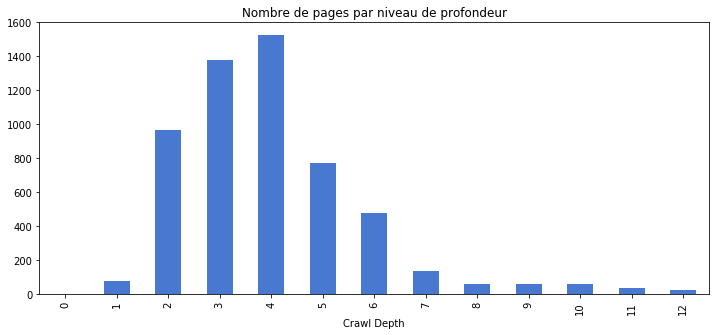

In [47]:
#Repartion du nombre de page par niveau de profondeur (vue simple)
urls.groupby(['Crawl Depth'])['Address'].count().plot(kind="bar", figsize=(12,5),title="Nombre de pages par niveau de profondeur")

### Nombre de pages par catégorie

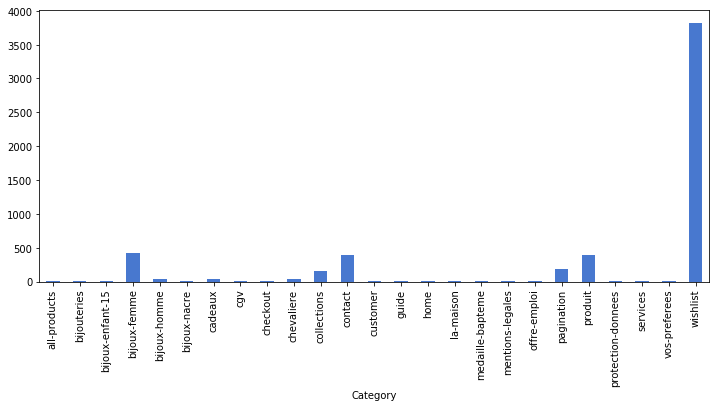

In [56]:
urls.groupby(["Category"])["Address"].count().plot(kind="bar",figsize=(12,5))

### Répartition des catégories de pages par niveau de profondeur

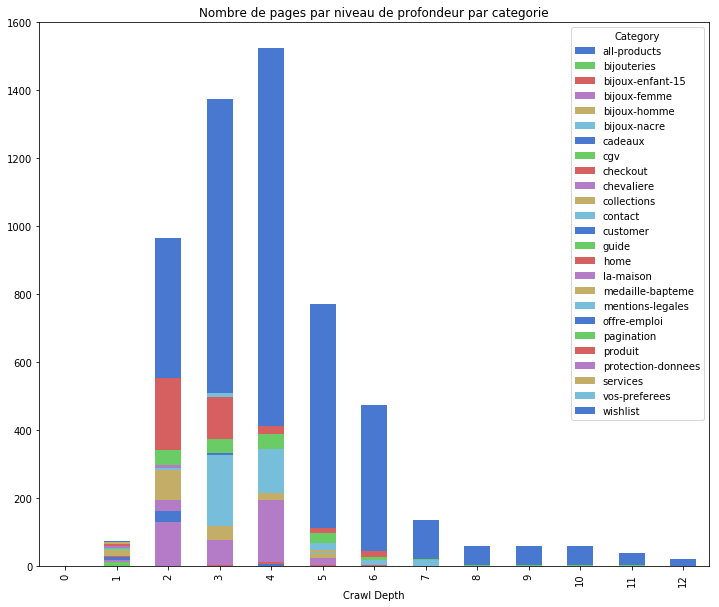

In [52]:
# Répartition des catégories de pages par niveau de profondeur
urls.groupby(['Crawl Depth','Category'])['Address'].count().unstack().plot(kind="bar",figsize=(12,10),stacked="true", title='Nombre de pages par niveau de profondeur par categorie')

### Nombre de pages utiles vs inutiles

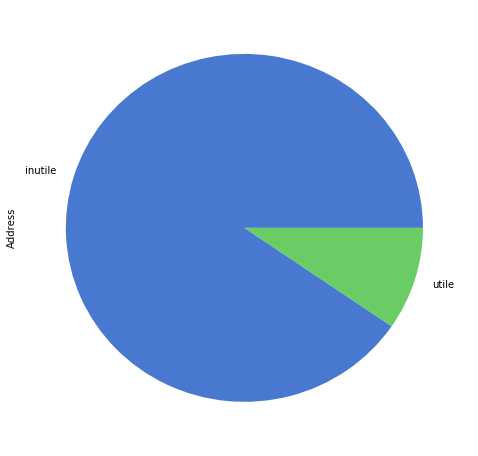

In [55]:
#Nombre de pages utiles vs inutiles
urls.groupby(['Type'])['Address'].count().plot(kind='pie',figsize=(8,8))

### Nombre de pages utiles/inutiles par niveau de profondeur

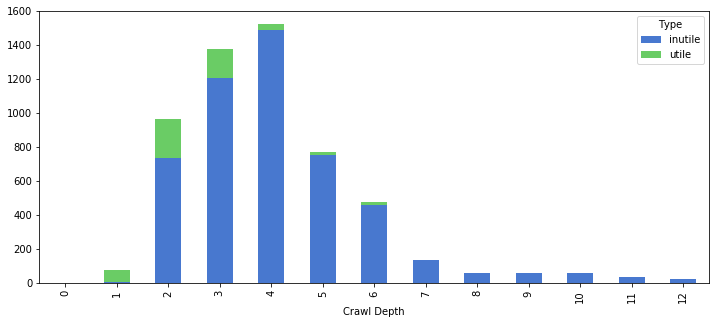

In [39]:
#Nombre de pages utiles/inutiles par niveau de profondeur
urls.groupby(['Crawl Depth','Type'])['Address'].count().unstack().plot(kind="bar",figsize=(12,5),stacked="true")

### Nombre de pages utiles par niveau de profondeur

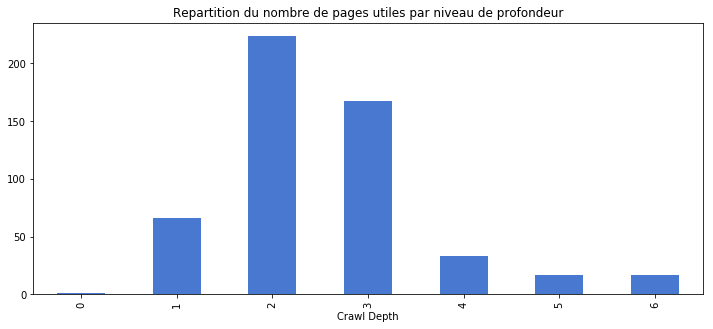

In [46]:
#Nombre de pages utiles par niveau de profondeur
urls_utiles = urls[["Address","Type", "Crawl Depth"]][(urls["Type"] == "utile") & (urls["Status Code"] == 200)]
urls_utiles.groupby(["Crawl Depth"])["Address"].count().plot(kind="bar", figsize=(12,5),title="Repartition du nombre de pages utiles par niveau de profondeur")

## 1.2 Répartition des codes d'erreurs par niveau de profondeur

### Répartition de la totalité des codes d'erreurs sur le site

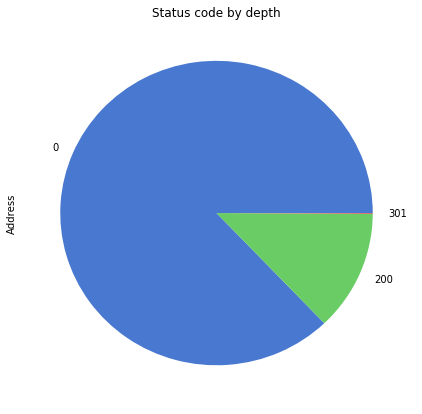

In [65]:
urls.groupby(['Status Code'])['Address'].count().plot(kind="pie",figsize=(7,7),title='Status code by depth entire website',stacked="true")

### Répartition des codes de réponses par niveau de profondeur

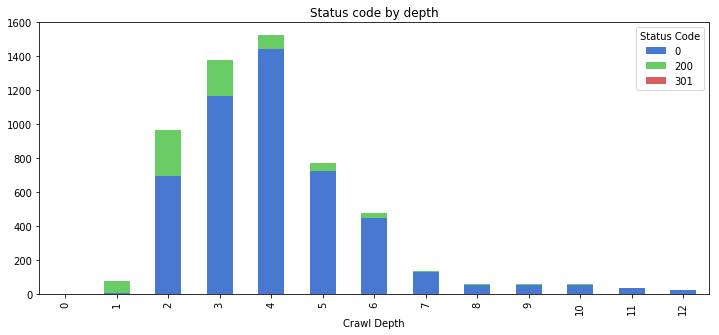

In [61]:
urls.groupby(['Crawl Depth', 'Status Code'])['Address'].count().unstack().plot(kind="bar",figsize=(12,5),title='Status code by depth',stacked="true")

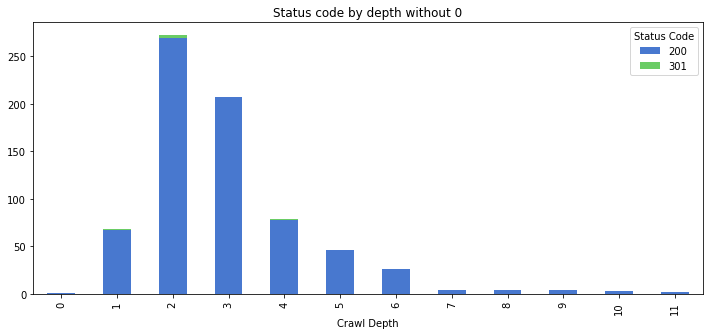

In [67]:
#Si URLs bloquées par le robots.txt
a = urls.loc[urls['Status Code'] != 0, ['Crawl Depth' , 'Status Code', 'Address']]
b = a.groupby(['Crawl Depth', 'Status Code'])['Address'].count().unstack().plot(kind="bar", figsize=(12,5), title='Status code by depth without 0', stacked="true")

### Pages avec des codes d'erreurs

In [79]:
urls_http_error=urls.loc[(urls['Status Code'] != 200) & (urls['Status Code'] != 0), ['Address', 'Status Code']]
urls_http_error

,Address,Status Code
911,https://fr.arthusbertrand.com/mentions-legales,301
976,https://fr.arthusbertrand.com/collections/coll...,301
1169,https://fr.arthusbertrand.com/medaille-bapteme,301
1460,https://fr.arthusbertrand.com/collections/coll...,301
1736,https://fr.arthusbertrand.com/produit/pendenti...,301


### Répartition des codes de réponse par catégorie de pages

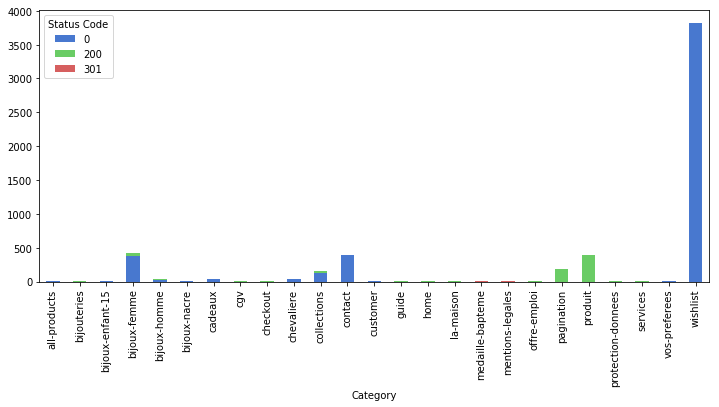

In [80]:
urls.groupby(['Category', 'Status Code'])['Address'].count().unstack().plot(kind="bar",figsize=(12,5),stacked="true")

## 1.3 Directives du Robots.txt

### Pages bloquées par le robots.txt ou la directive NOINDEX

In [96]:
urls_blocked_by_robots = urls.loc[(urls['Status'] == "Blocked by Robots.txt") | (urls['Meta Robots 1'] == "NOINDEX"),
                                  ['Address', 'Status', 'Meta Robots 1', 'Category']]
urls_blocked_by_robots

,Address,Status,Meta Robots 1,Category
0,https://fr.arthusbertrand.com/wishlist/index/a...,Blocked by Robots.txt,NaN,wishlist
1,https://fr.arthusbertrand.com/wishlist/index/a...,Blocked by Robots.txt,NaN,wishlist
2,https://fr.arthusbertrand.com/wishlist/index/a...,Blocked by Robots.txt,NaN,wishlist
3,https://fr.arthusbertrand.com/wishlist/index/a...,Blocked by Robots.txt,NaN,wishlist
5,https://fr.arthusbertrand.com/wishlist/index/a...,Blocked by Robots.txt,NaN,wishlist
6,https://fr.arthusbertrand.com/bijoux-femme/bag...,Blocked by Robots.txt,NaN,bijoux-femme
7,https://fr.arthusbertrand.com/wishlist/index/a...,Blocked by Robots.txt,NaN,wishlist
8,https://fr.arthusbertrand.com/bijoux-femme/bag...,Blocked by Robots.txt,NaN,bijoux-femme
9,https://fr.arthusbertrand.com/wishlist/index/a...,Blocked by Robots.txt,NaN,wishlist
10,https://fr.arthusbertrand.com/bijoux-femme/bag...,Blocked by Robots.txt,NaN,bijoux-femme


### Pages bloquées par les directives Robots.txt ou Meta par catégorie

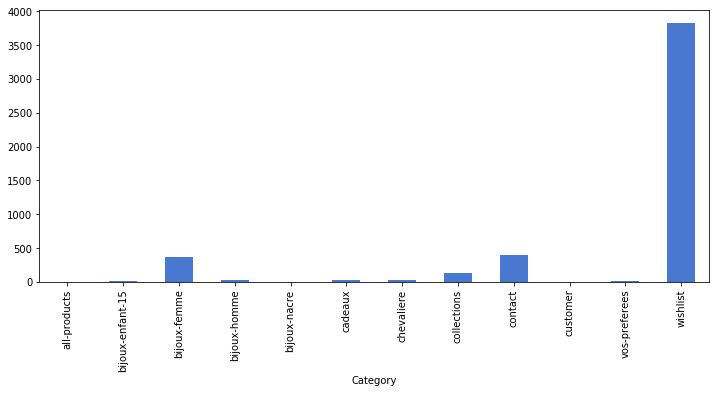

In [98]:
urls_blocked_by_robots.groupby(['Category'])['Status'].count().plot(kind="bar", figsize=(12,5))

## 1.4 Temps de chargement

### Temps de chargement moyen du site

In [101]:
urls['Response Time'].mean()

20.657593575418993

### Temps de chargement moyen par catégorie

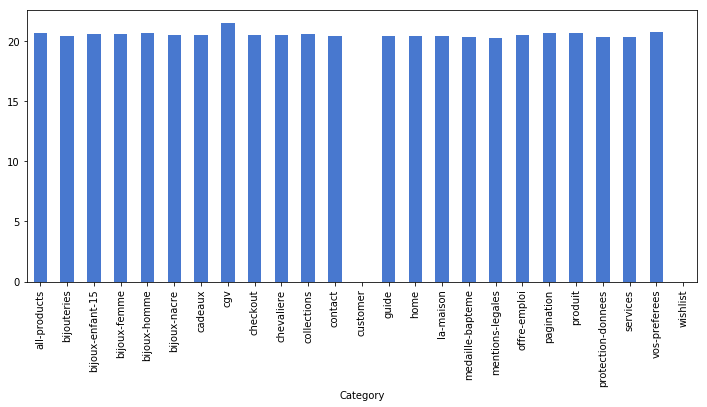

In [105]:
urls.groupby(['Category'])['Response Time'].mean().plot(kind="bar", figsize=(12,5))

## Nombre de liens entrants par niveau de profondeur
Les résultats ci-dessous montrent le nombre de liens entrants en fonction du niveau de profondeur des pages

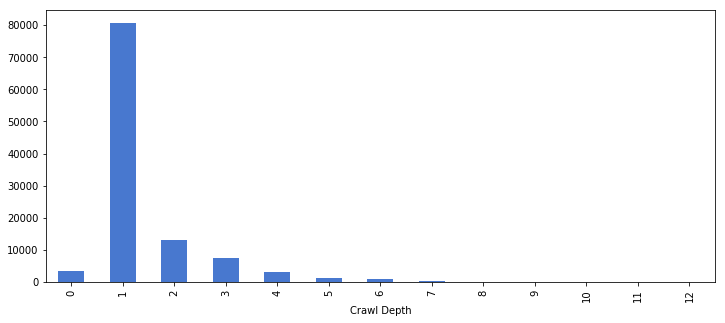

In [10]:
# Depth bar chart
urls.groupby(['Crawl Depth'])['Inlinks'].sum().plot(kind="bar",figsize=(12,5))

## Nombre de liens sortants (IN/OUT) par niveau de profondeur

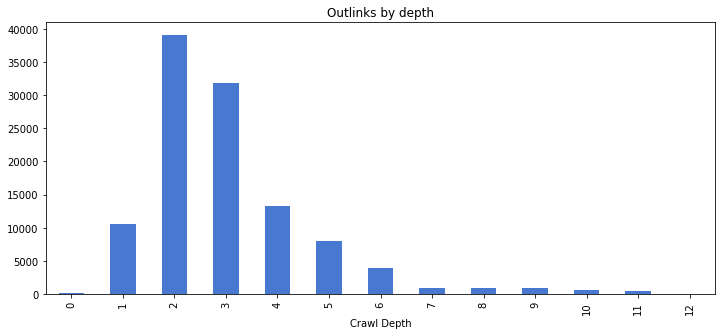

In [11]:
urls.groupby(['Crawl Depth'])['Outlinks'].sum().plot(kind="bar",figsize=(12,5), title='Outlinks by depth',stacked="true")

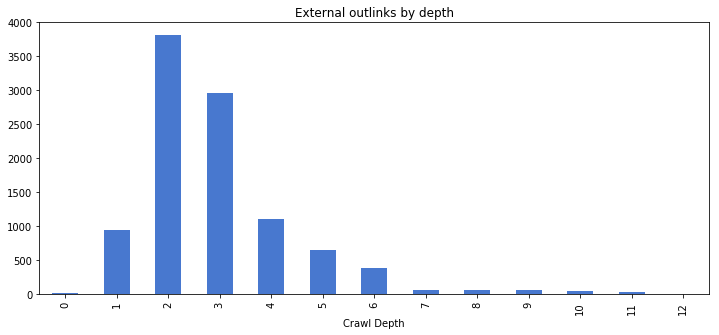

In [12]:
urls.groupby(['Crawl Depth'])['External Outlinks'].sum().plot(kind="bar",figsize=(12,5), title='External outlinks by depth')

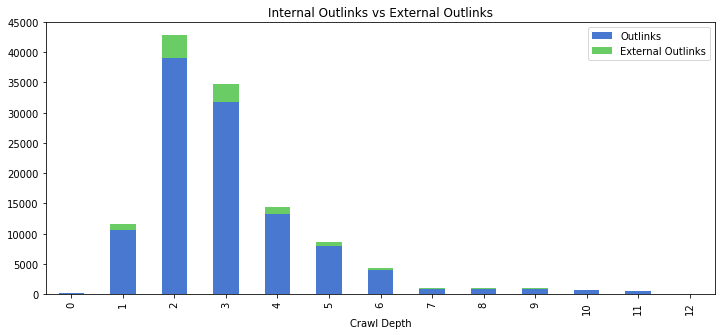

In [13]:
urls.groupby(['Crawl Depth'])['Outlinks', 'External Outlinks'].sum().plot(kind="bar", figsize=(12,5), stacked="true", title="Internal Outlinks vs External Outlinks")

##### Domains receiving external links

In [14]:
all_external_outlinks = links['Destination'][~links['Destination'].str.contains(domainname)].groupby(links['Destination']).count()
all_external_outlinks

Destination
http://www.colissimo.fr/portail_colissimo/suivre.do?language=fr_FR                                                           1
http://www.dhl.fr/fr/dhl_express/suivi_expedition.html                                                                       1
http://www.laposte.fr/particulier/outils/suivre-vos-envois?colissimo=true                                                    1
https://decorations.arthus-bertrand.fr/                                                                                   1422
https://medailles.arthusbertrand.com/                                                                                     1423
https://medailles.arthusbertrand.com/medaille-bapteme                                                                        1
https://plus.google.com/+ArthusbertrandFrOfficiel                                                                          711
https://twitter.com/ArthusBertrand_                                                                

In [15]:
#Export all external outlinks
all_external_outlinks.to_csv('output/all_external_outlinks.csv')

In [16]:
# Export broken links to CSV
links[links["Status Code"] == 404].to_csv('external_outlinks_404.csv')

## Semantic analyse
Title, H1, Description, Nombre de mots, Duplication...

In [17]:
#Etude des Title
title_trop_longs = urls[["Address","Title 1"]][(urls["Status Code"] == 200) & (urls["Title 1"].str.len() > 70 )]
title_trop_longs.to_csv('output/title_trop_long.csv')

<br/>
<br/>

## Data enhancement

Several Pandas DataFrames can be merged together, which is very helpful when you want to add external data to enhance your analysis.

For example, we can use our [categorize script](https://gitlab.com/databulle/categorize) to associate each crawled URL with its category.  

__Step 1:__ save URLs to a new file.

In [18]:
# Save URLs to file
urls['Address'].to_csv('data/urls.csv', index=None)

__Step 2:__ use the script to categorize URLs, and save results as `categorized.csv`.  
See [our blog](https://www.databulle.com/blog/code/categorize.html) for more details on how to use this script.  

__Step 3:__ load categorized URLs into our DataFrame.  

We'll create a new DataFrame (`cats`) in which we'll load our categorized URLs.  
Then, using the `merge()` function we'll add this newly generated data to our original `urls` DataFrame.  
`merge()` works a lot like joins in SQL, but you'll find more on that in [the documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).  

In [19]:
# Load categorized URLs
cats = pd.read_csv('data/categorized.csv')
cats.columns = ['Address','Category']
# Merge the two DataFrames
urls = urls.merge(cats, on='Address', how='left')
urls.head()
# Check to the right for your new `Category` column.

,Address,Crawl Depth,Content,Status Code,Status,Title 1,Title 1 Length,Title 1 Pixel Width,Meta Description 1,Meta Description 1 Length,...,Unique Outlinks,External Outlinks,Unique External Outlinks,Hash,Response Time,Last Modified,Redirect URI,Redirect Type,URL Encoded Address,Category
0,https://fr.arthusbertrand.com/wishlist/index/a...,6,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist
1,https://fr.arthusbertrand.com/wishlist/index/a...,4,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist
2,https://fr.arthusbertrand.com/wishlist/index/a...,4,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist
3,https://fr.arthusbertrand.com/wishlist/index/a...,3,NaN,0,Blocked by Robots.txt,NaN,0,0,NaN,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,https://fr.arthusbertrand.com/wishlist/index/a...,wishlist
4,https://fr.arthusbertrand.com/produit/bague-am...,3,text/html; charset=UTF-8,200,OK,Bague Egerie - Arthus-Bertrand - 21223601XX,43,369,"Arthus-Bertrand vous présente Egerie, Bague Ar...",118,...,72,14,10,5324f2fff367f993be7bb3ed276f9410,20.663,NaN,NaN,NaN,https://fr.arthusbertrand.com/produit/bague-am...,produit


Using this new data is very easy. Here are some example charts:  

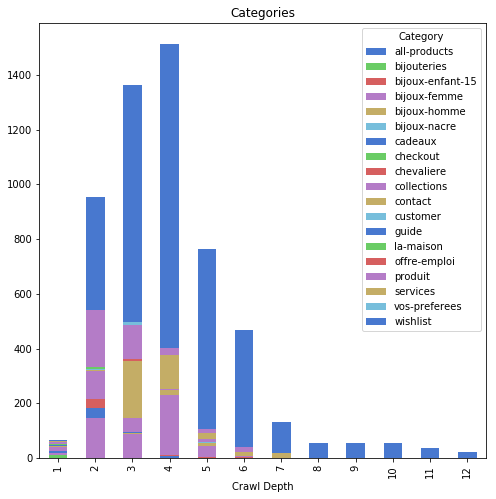

In [25]:
# Categories pie chart
urls.groupby(['Crawl Depth', 'Category'])['Category'].count().unstack().plot(kind="bar", figsize=(8,8), title='Categories',stacked="true")

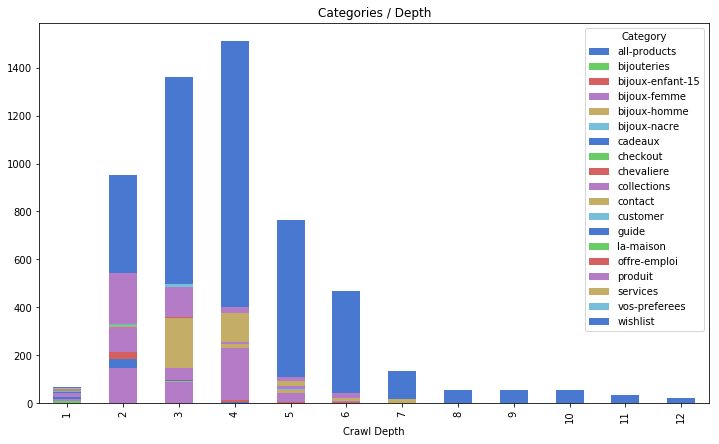

In [21]:
# Categories / Depth
urls.groupby(["Crawl Depth","Category"])['Address'].count().unstack().plot(kind="bar", figsize=(12,7), title='Categories / Depth', stacked=True)

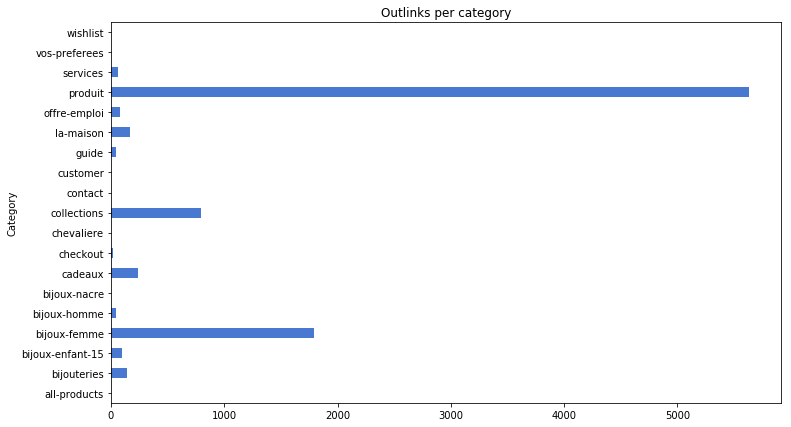

In [28]:
# Outlinks per category
urls.groupby("Category")["External Outlinks"].sum().plot(kind="barh", figsize=(12,7), title="Outlinks per category")

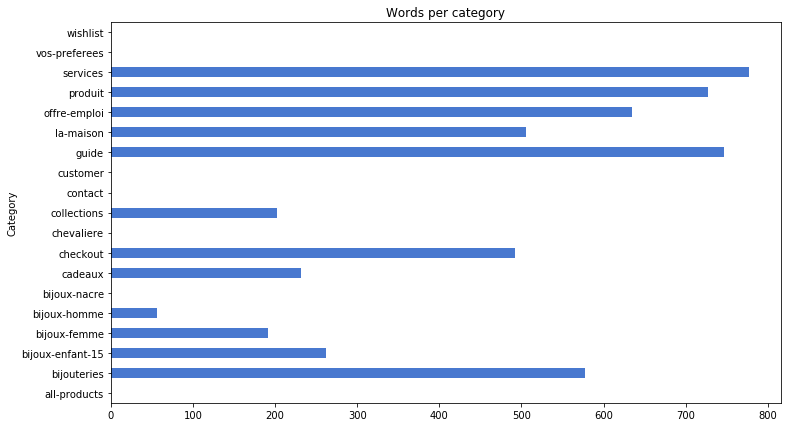

In [29]:
# Words per category
urls.groupby("Category")["Word Count"].mean().plot(kind="barh", figsize=(12,7), title="Words per category")

You could also try some more complex merging. For instance, this finds all links to 301 redirects and adds redirect URL to the table:

In [24]:
# Create a new DataFrame with 301 links
redirs = links[links["Status Code"] == 301]
# Merge with `urls` to get Redirect URI
redirs = redirs.merge(urls[urls["Status Code"] == 301][["Address","Redirect URI"]], how="left", left_on="Destination", right_on="Address")
# Drop Address column
redirs = redirs.drop("Address", axis=1)
# Show first 10 rows
redirs.head()

,Source,Destination,Anchor,Status Code,Follow,Redirect URI
0,https://fr.arthusbertrand.com/produit/bague-am...,https://fr.arthusbertrand.com/mentions-legales,Mentions Légales,301.0,True,https://fr.arthusbertrand.com/protection-donnees
1,https://fr.arthusbertrand.com/produit/bague-am...,https://www.arthus-bertrand.fr/collections/col...,NaN,301.0,True,NaN
2,https://fr.arthusbertrand.com/produit/bracelet...,https://fr.arthusbertrand.com/mentions-legales,Mentions Légales,301.0,True,https://fr.arthusbertrand.com/protection-donnees
3,https://fr.arthusbertrand.com/produit/bracelet...,https://www.arthus-bertrand.fr/collections/col...,NaN,301.0,True,NaN
4,https://fr.arthusbertrand.com/bijoux-femme/col...,https://fr.arthusbertrand.com/mentions-legales,Mentions Légales,301.0,True,https://fr.arthusbertrand.com/protection-donnees


## What now ?

Those were just a few basic examples of what you can do with a few lines of code.  
You could add data from APIs, try some Machine Learning libs, calculate internal PageRank... It's up to you now!  